In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

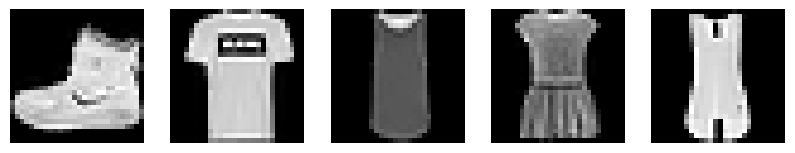

In [3]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()

In [8]:
modelo= Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(512, activation='relu'),  
    Dropout(0.2),  
    Dense(256, activation='relu'),  
    Dropout(0.2),  
    Dense(128, activation='relu'),  
    Dense(10, activation='softmax')  
])

modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

entrenado = modelo.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

test_loss, test_acc = modelo.evaluate(x_test, y_test, verbose=2)
print(f'\nAccuracy del modelo : {test_acc:.4f}')

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7525 - loss: 0.6762 - val_accuracy: 0.8399 - val_loss: 0.4389
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8498 - loss: 0.4125 - val_accuracy: 0.8564 - val_loss: 0.3899
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8628 - loss: 0.3728 - val_accuracy: 0.8537 - val_loss: 0.3929
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8726 - loss: 0.3479 - val_accuracy: 0.8656 - val_loss: 0.3688
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8777 - loss: 0.3367 - val_accuracy: 0.8701 - val_loss: 0.3615
313/313 - 0s - 1ms/step - accuracy: 0.8701 - loss: 0.3615

Accuracy del modelo : 0.8701


In [9]:
#Podemos analizar que 5 epochs es suficiente ya que a de la 4 a la 5 la perdida no es significativ y el accuracy de 87% se establece a partir de la capa 4, por lo que las capas utilizadas nos dan un buen resultado cuando se entrena el modelo aunque podría ser mejorable.
